In [49]:
import importlib
import training
importlib.reload(training)

prepare_and_run = training.prepare_and_run
params = {
    "model": "resnet18",
    "batch_size": 8,
    "epochs": 25,
    "device": "cuda",
    "layer_to_substitude": "fc",
    "lr": 1e-3,
}
cv_monitor = prepare_and_run(params)

Fold #39: 100%|██████████| 25/25 [00:02<00:00,  9.79it/s]


val metrics 0.718
train metrics 0.7753464348763227


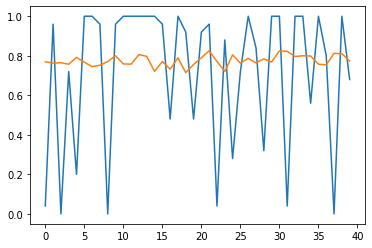

In [50]:
import numpy as np
import matplotlib.pyplot as plt

val_mean_metrics = []
val_mean_losses = []
train_mean_metrics = []
train_mean_losses = []

for monitor in cv_monitor.validation:
    val_mean_metrics.append(np.mean(monitor.epoch_metrics))
    val_mean_losses.append(np.mean(monitor.epoch_losses))

for monitor in cv_monitor.train:
    train_mean_metrics.append(np.mean(monitor.epoch_metrics))
    train_mean_losses.append(np.mean(monitor.epoch_losses))


print('val metrics', np.mean(val_mean_metrics))
print('train metrics', np.mean(train_mean_metrics))

plt.plot(val_mean_metrics)
plt.plot(train_mean_metrics)
